## 2.1 Bits and Data Tp s
### 2.1.1 The Bit as the Unit of Information 
The computer is organized as a system with several levels of transformation. 

A problem stated in a natural language is solved by the electrons moving around inside the electronics of the computer.

Inside the computer, millions of very tiny, very fast devices control the movement of those electrons.

These devices react to the presence or absence of voltages in electronic circuits. 
- They could react to the actual voltages, rather than simply to the presence or absence of voltages. However, this would make the control and detection circuits more complex than they need to be.
- much easier simply to detect whether or not a voltage exists between a pair of points in a circuit

We symbolically represent the presence of a voltage as "1" and the absence of a voltage as "0."

We refer to each 0 and each 1 as a "bit," which is a shortened form of binary digit.

the electronic circuits in the computer differentiate voltages close to 0 from voltages far from 0. So, for example, if the computer expects a voltage of 2.9 volts or a voltage of 0 volts (2.9 volts signifying 1 and 0 volts signifying 0), then a voltage of 2.6 volts will be taken as a 1 and 0.2 volts will be taken as a 0.

To get useful work done by the computer, it is necessary to be able to identify uniquely a large number of distinct values. The voltage on one wire can represent uniquely one of only two things. One thing can be represented by 0, the other thing can be represented by 1. Thus, to identify uniquely many things, it is necessary to combine multiple bits

For example, if we use eight bits (corresponding to the voltage present on eight wires), we can represent one particular value as 01001110, and another value as 11100111. In fact, if we are limited to eight bits, we can differentiate at most only 256 (that is, 2^8) different values. In general, with k bits, we can distinguish at most 2^k  distinct items. Each pattern of these k bits is a code; that is, it corresponds to a particular value.

### 2.1.2 Data Types 
There are many ways to represent the same value.

It is not enough simply to represent values; we must be able to operate on those values. We say a particular representation is a data type if there are operations in the computer that can operate on information that is encoded in that representation.

Each ISA has its own set of data types and its own set of instructions that can operate on those data types. 

## 2.2 Integer Data Types
### 2.2.1 Unsigned Integers 
If we wish to perform a task some specific number of times, unsigned integers enable us to keep track of this number easily by simply counting how many times we have performed the task "so far." 

Unsigned integers also provide a means for identifying different memory locations in the computer, in the same way that house numbers differentiate 129 Main Street from 131 Main Street.

We can represent unsigned integers as strings of binary digits. To do this, we use a positional notation much like the decimal system that you have been using since you were three years old

The 2's complement representation works the same way, except that the digits used are the binary digits 0 and 1, and the base is 2, rather than 10.

### 2.2.2 Signed Integers 
However, to do useful arithmetic, it is often (although not always) necessary to be able to deal with negative quantities as well as positive. We could take our 2^k distinct patterns of k bits and separate them in half, half for positive numbers, and half for negative numbers.

In this way, with five-bit codes, instead of representing integers from 0 to +31, we could choose to represent positive integers from +1 to +15 and negative integers from —1 to —15. There are 30 such integers. Since 2^5 is 32, we still have two 5-bit codes unassigned. One of them, 00000, we would presumably assign to the value 0, giving us the full range of integer values from — 15 to +15. That leaves one more five-bit code to assign, and there are different ways to do this, as we will see momentarily.

We are still left with the problem of determining what codes to assign to what values. That is, we have 32 codes, but which value should go with which code?
Positive integers are represented in the straightforward positional scheme.
Since there are k bits, and we wish to use exactly half of the 2k  codes to represent the integers from 0 to (2^k-l) — 1, all positive integers will have a leading 0 in their representation. In our example (with k = 5), the largest positive integer +15 is represented as 01111. 

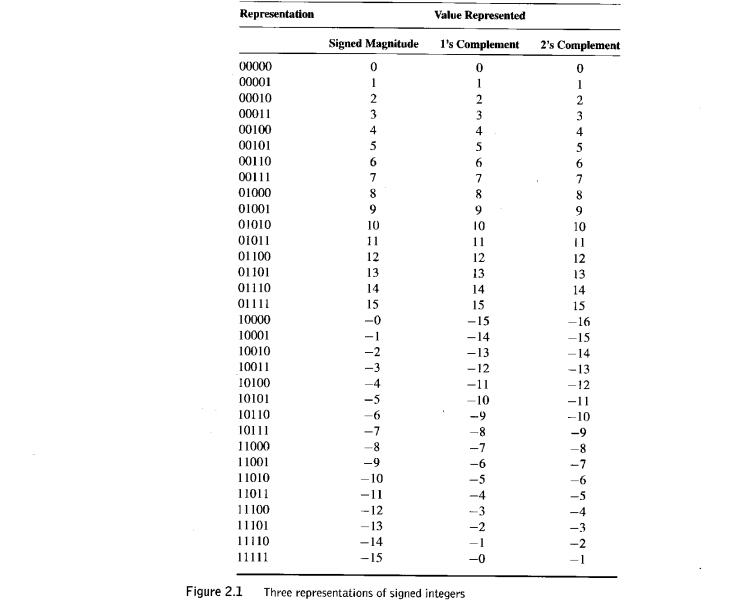

Note that in all three data types shown in Figure 2.1, the representation for 0 and all the positive integers start with a leading 0. What about the representations for the negative numbers (in our five-bit example, —1 to -15)? 

The first thought that usually comes to mind is: If a leading 0 signifies a positive integer, how about letting a leading 1 signify a negative integer?
- The result is the signed-magnitude data type shown in Figure 2.1

A second idea (which was actually used on some early computers such as the Control Data Corporation 6600) was the following: Let a negative number be represented by taking the representation of the positive number having the same magnitude, and "flipping" all the bits. 
- eg: since +5 is represented as 00101, we designate —5 as 11010.
- This data type is referred to in the computer engineering community as 1's complement

At this point, you might think that a computer designer could assign any bit pattern to represent any integer he or she wants. And you would be right! Unfortunately, that could complicate matters when we try to build a logic circuit to addtwo integers. 

In fact, the signed-magnitude and l's complement data types both require unnecessarily cumbersome hardware to do addition.

Because computer designers knew what it would take to design a logic circuit to add two integers, they chose representations that simplified that logic circuit. The result is the 2's complement data type. It is used on just about every computer manufactured today. 

## 2.3 2's Complement Integers 
The choice of representations for the negative integers was based, as we said previously, on the wish to keep the logic circuits as simple as possible.

Almost all computers use the same basic mechanism to do addition - ALU.
- an ALU has two inputs and one output.
- It performs addition by adding the binary bit patterns at its inputs, producing a bit pattern at its output that is the sum of the two input bit patterns.

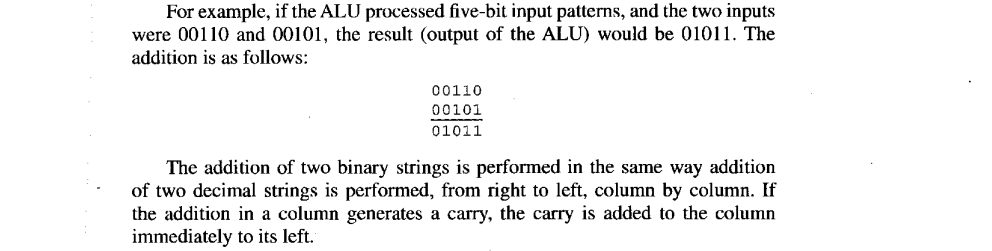

What is particularly relevant is that the binary ALU does not know (and does
not care) what the two patterns it is adding represent. It simply adds the two binary
patterns. Since the binary ALU only ADDs and does not CARE, it would be a
nice benefit of our assignment of codes to the integers if it resulted in the ALU
doing the right thing. 

For starters, it would be nice if, when the ALU adds the representation for an arbitrary integer to the integer of the same magnitude and opposite sign, the sum is 0

To accomplish that, the 2's complement data type specifies the representation for each negative integer so that when the ALU adds it to the representation of the positive integer of the same magnitude, the result will be the representation for 0. For example, since 00101 is the representation of +5, 11011 is chosen as the representation for —5.  

Moreover, and more importantly, as we sequence from representations of -15 to +15, the ALU is adding 00001 to each successive representation. We can express this mathematically as: 
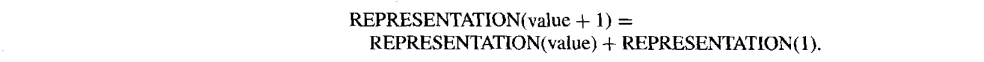

This is sufficient to guarantee (as long as we do not get a result larger than +15 or smaller than — 16) that the binary ALU will perform addition correctly. 

Note in particular the representations for — 1 and 0, that is, 11111 and 00000.
- When we add 00001 to the representation for —1, we do get 00000, but we also generate a carry. 
- That carry does not influence the result. 
- That is, the correct result of adding 00001 to the representation for —1 is 0, not 100000. Therefore, the carry is ignored. 
- In fact, because the carry obtained by adding 00001 to 11111 is ignored, the carry can always be ignored when dealing with 2's complement arithmetic.

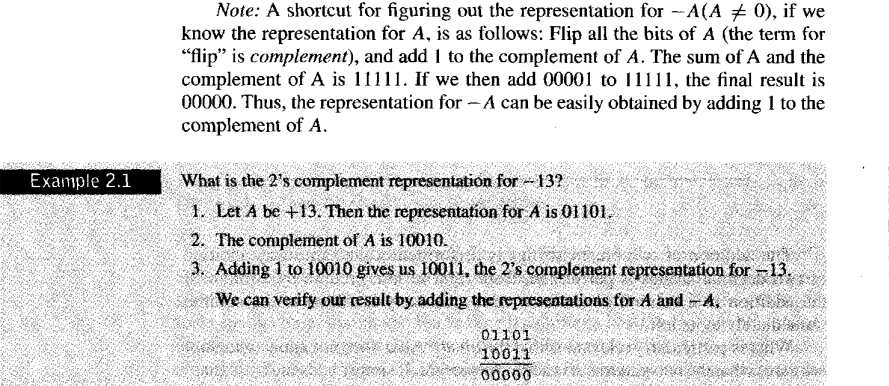

## 2.4 Binary-Decimal Conversion 
It is often useful to convert integers between the 2's complement data type and the decimal representation that you have used all your life. 

### 2.4.1 Binary to Decimal Conversion 
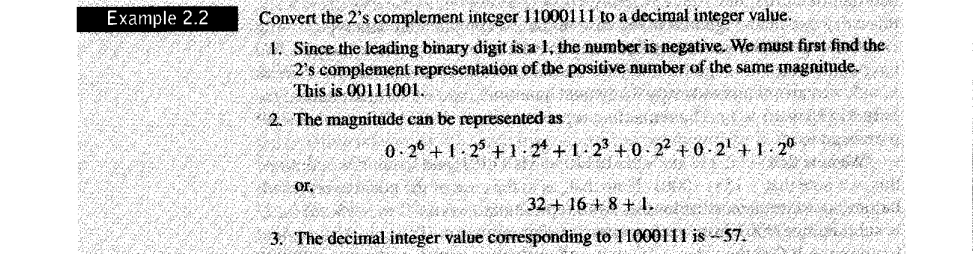

### 2.4.2 Decimal to Binary Conversion 
Converting from decimal to 2's complement is a little more complicated. The crux of the method is to note that a positive binary number is odd if the rightmost digit is 1 and even if the rightmost digit is 0. 

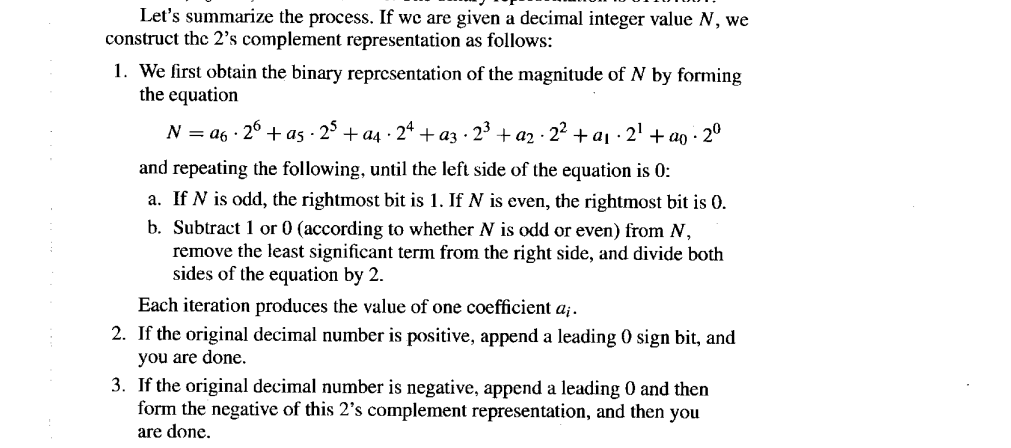

## 2.5 Operations on Bits—Part I: Arithmetic
### 2.5.1 Addition and Subtraction
Arithmetic on 2's complement numbers is very much like the arithmetic on decimal numbers

Addition still proceeds from right to left, one digit at a time. At each point, we generate a sum digit and a carry
-  Instead of generating a carry after 9 (since 9 is the largest decimal digit), we generate a carry after 1 (since 1 is the largest binary digit)

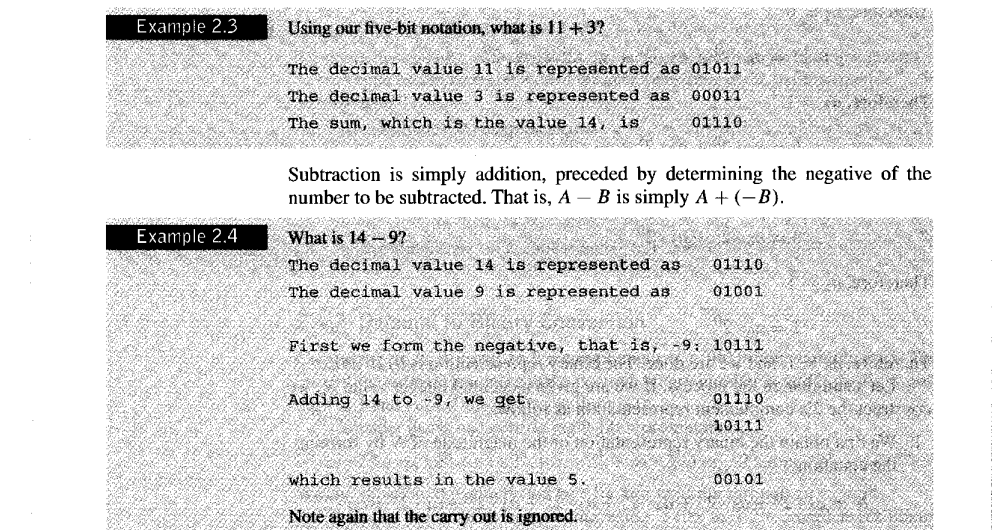

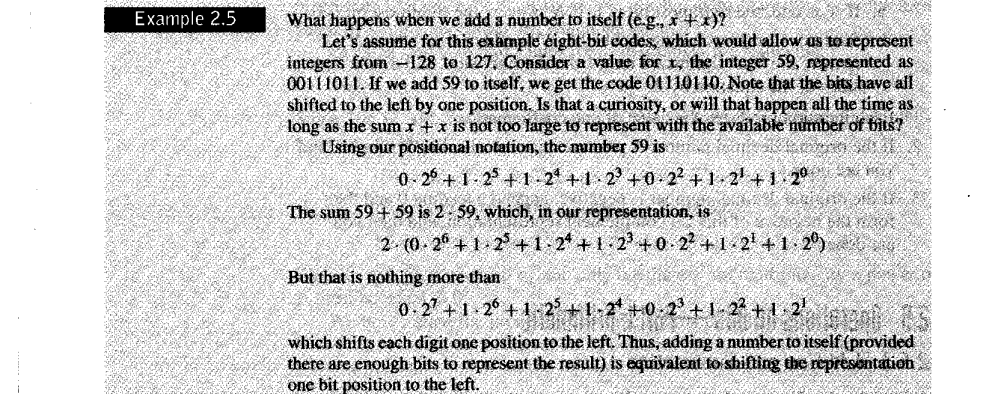

### 2.5.2 Sign-Extension 
It is often useful to represent a small number with fewer bits. 

**Eg:** rather than represent the value 5 as 0000000000000101 , there are times when it is useful to allocate only six bits to represent the value 5: 000101.

There is little confusion, since we are all used to adding leading zeros without affecting the value of a number.

**What about negative representations?** 
- We obtained the negative representation from its positive counterpart by complementing the positive representation and adding 1.
- Thus, the representation for —5, given that 5 is represented as 000101, is 111011.
- If 5 is represented as 0000000000000101, then the representation for —5 is 1111111111111011.
- In the same way that leading 0s do not affect the value of a positive number, leading 1s do not affect the value of a negative number.

In order to add representations of different lengths, it is first necessary to represent them with the same number of bits. 

**Eg:** suppose we wish to add the number 13 to -5 , where 13 is represented as 0000000000001101 and —5 is represented as 111011. 

If we do not represent the two values with the same number of bits, we have
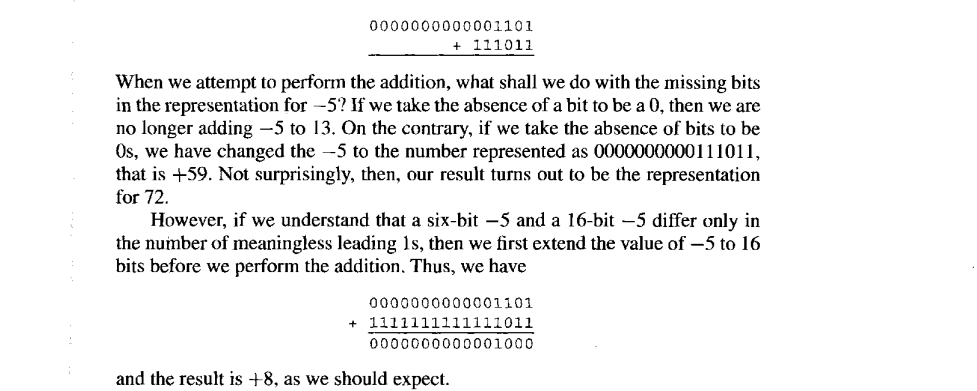


- The value of a positive number does not change if we extend the sign bit 0 as many bit positions to the left as desired. 
- Similarly, the value of a negative number does not change by extending the sign bit 1 as many bit positions to the left as desired. 
- Since in both cases, it is the sign bit that is extended, we refer to the operation as **Sign-EXTension**, often abbreviated **SEXT**.
-  Sign-extension is performed in order to be able to operate on bit patterns of different lengths. It does not affect the values of the numbers being represented.

### 2.5.3 Overflow 
**Eg:** We say the odometer overflowed. Representing 100092 as 00092 is unacceptable. As more and more cars lasted more than 100,000 miles, car makers felt the pressure to add a digit to the odometer. Today, practically all cars overflow at 1,000,000 miles, rather than 100,000 miles.
- The odometer provides an example of unsigned arithmetic. The miles you add are always positive miles. The odometer reads 000129 and you drive 50 miles. The odometer now reads 000179.
- Overflow is a carry out of the leading digit. 

In the case of signed arithmetic, or more particularly, 2's complement arithmetic, overflow is a little more subtle.

## 2.6 Operations on Bits - Part II: Logical Operations 
We have seen that it is possible to perform arithmetic (e.g., add, subtract) on values represented as binary patterns. 

Another class of operations that it is useful to perform on binary patterns is the set of logical operations.

**Logical operations** operate on **logical variables** - A logical variable can have one of two values, **0 or 1**.

The name logical is a historical one; it comes from the fact that the two values 0 and 1 can represent the two logical values false and true, but the use of logical operations has traveled far from this original meaning.

There are several basic logic functions, and most ALUs perform all of them.

### 2.6.1 The AND Function
AND is a binary logical function. This means it requires two pieces of input data.

Said another way, AND requires two source operands. Each source is a logical variable, taking the value 0 or 1.

**The output of AND is 1 only if both sources have the value 1. Otherwise, the output is 0.**

We can think of the AND operation as the ALL operation; that is, the output is 1 only if ALL two inputs are 1. Otherwise, the output is 0.

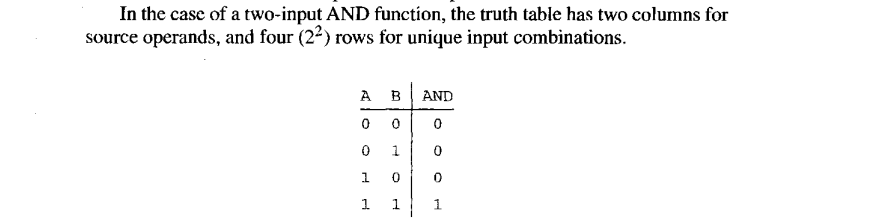

We can apply the logical operation AND to two bit patterns of m bits each. This involves applying the operation individually to each pair of bits in the two source operands. 

**Ex:** if a and b in Example 2.6 are 16-bit patterns, then c is the AND of a and b. This operation is often called a **bit-wise AND**. 

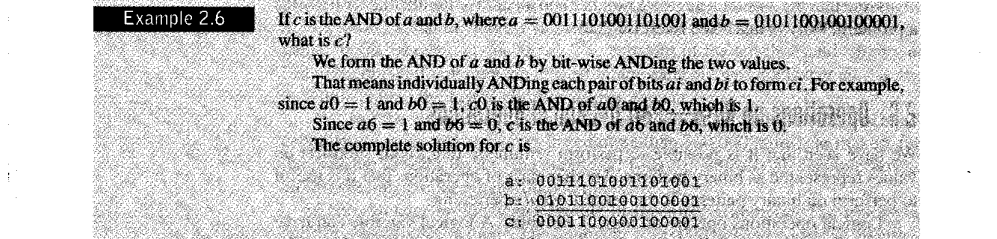

**Ex:** The **bit mask** is said to mask out the values

A bit mask is a binary patten that enables the bits of A to be separated into two parts generally the part you care about and the parts you wish to ignore

If A is 01010110. the AND of A and the bit mask 00000011 is 00000010. 


### 2.6.2 The OR Function 
OR is also a binary logical function. It requires two source operands, both of which are logical variables.

**The output of OR is 1 if any source has the value 1**

Only if both sources are 0 is the output 0. We can think of the OR operation as the ANY operation; that is, the output is 1 if ANY of the two inputs are 1.

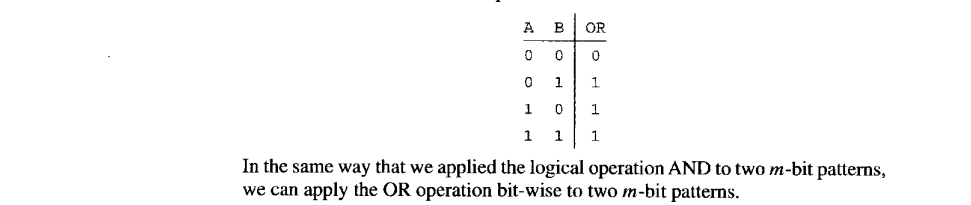

**Eg;** 

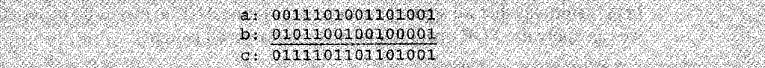

### 2.6.3 The NOT Function 
NOT is a **unary logical function**. This means it operates on only one source operand. It is also known as the **complement operation**.

**The output is formed by complementing the input. We sometimes say the output is formed by inverting the input**

A 1 input results in a 0 output. A 0 input results in a 1 output. 

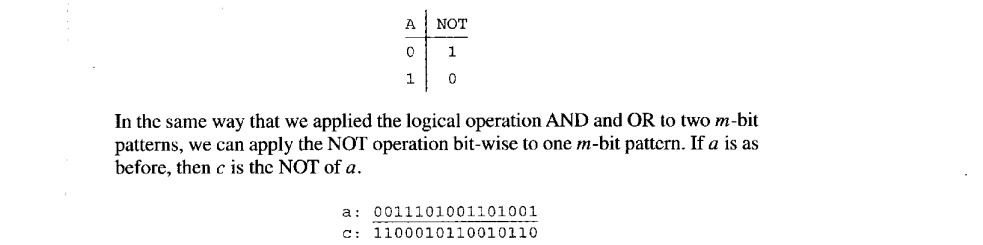

### 2.6.4 The Exclusive-OR Function 
Exclusive-OR, often abbreviated **XOR**, is a **binary logical function**.

It, too, requires two source operands, both of which are logical variables.

**The output of XOR is 1 if the two sources are different. The output is 0 if the two sources are the same.**

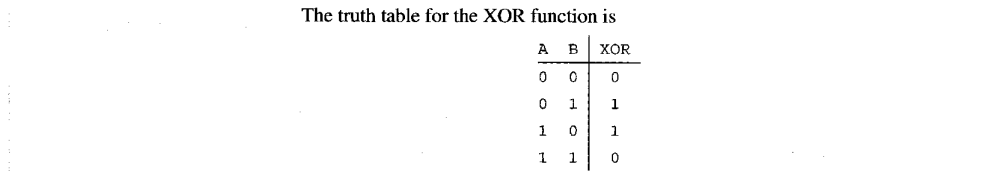

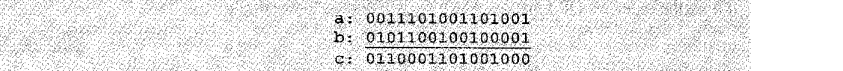

**Eg:** Suppose we wish to know if two patterns are identical. Since the XOR function produces a 0 only if the corresponding pair of bits is identical, **two patterns are identical if the output of the XOR is all zeros**.

## 2.7 Other Representations 
### 2.7.1 The Bit Vector 
It is often useful to describe a complex system made up of several units, each of which is individually and independently busy or available. 

- This system could be a manufacturing plant where each unit is a particular machine. 
- Or the system could be a taxicab network where each unit is a particular taxicab.

In both cases, it is important to identify which units are busy and which are available, so that work can be assigned as needed.

Say we have n such units. We can keep track of these n units with an n-bit binary pattern we call a bit vector, where a bit is 1 if the unit is free and 0 if the unit is busy. 

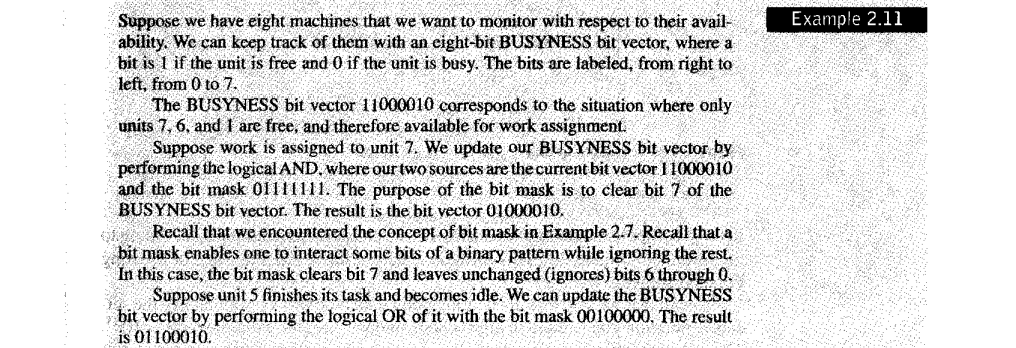

### 2.7.2 Floating Point Data Type 
Instead of using all the bits (except the sign bit) to represent the precision of a value, the floating point data type allocates some of the bits to the range of values (i.e., how big or small) that can be expressed. The rest of the bits (except for the sign bit) are used for precision.

Most IS As today specify more than one floating point data type. One of them, usually called float, consists of 32 bits, allocated as follows: 
- 1 bit for the sign (positive or negative)
- 8 bits for the range (the exponent field)
- 23 bits for precision (the fraction field)

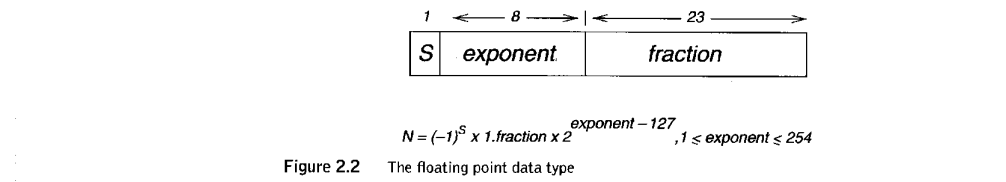

**Eg:** 6.023 * 10^23
- This representation has three parts: the sign, which is positive, the significant digits 6.023, and the exponent 23. We call the significant digits the fraction. 
- Note that the fraction is normalized, that is, exactly one nonzero decimal digit appears to the left of the decimal point.

- Instead of an exponent of two decimal digits as in 6.023 * 10^23, we have in **Figure 2.2** eight binary digits. 
- Instead of a radix of 10, we have a radix of 2.

Our purpose in including this section in the textbook is to at least let you know that there is, in addition to 2's complement integers, another very important data type available in almost all IS As. This data type is called floating point, it allows very large and very tiny numbers to be expressed at the expense of reducing the number of binary digits of precision. 

### 2.7.3 ASCII Codes 
Another representation of information is the standard code that almost all computer equipment manufacturers have agreed to use for transferring character codes between the main computer processing unit and the input and output devices.

ASCII greatly simplifies the interface between a keyboard manufactured by one company, a computer made by another company, and a monitor made by a third company. 

Each key on the keyboard is identified by its unique ASCII code

When you type a key on the keyboard, the corresponding eight-bit code is stored and made available to the computer. 
>Where it is stored and how it gets into the computer is discussed in Chapter 8.

Most keys are associated with more than one code. For example, the ASCII code for the letter E is 01000101, and the ASCII code for the letter e is 01100101. Both are associated with the same key, although in one case the Shift key is also depressed while in the other case, it is not. 

In order to display a particular character on the monitor, the computer must transfer the ASCII code for that character to the electronics associated with the monitor. That, too, is discussed in Chapter 8.

### 2.7.4 Hexadecimal Notation 
a representation that is used more as a convenience for humans than as a data type to support operations being performed by the computer.

evolves nicely from the positional binary notation and is useful for dealing with long strings of binary digits without making errors.

Since the symbols must represent values from 0 to 15, we assign symbols to these values as follows: 0, 1,2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F.

That is, we represent 0000 with the symbol 0,0001 with the symbol 1,.. . 1001 with 9,1010 with A, 1011 with B, .. . 1111 with F. The resulting notation is hexadecimal, or base 16. 

Now, then, what is this hexadecimal representation good for, anyway? It seems like just another way to represent a number without adding any benefit.
Let's return to the exercise where you tried to write from memory the string 

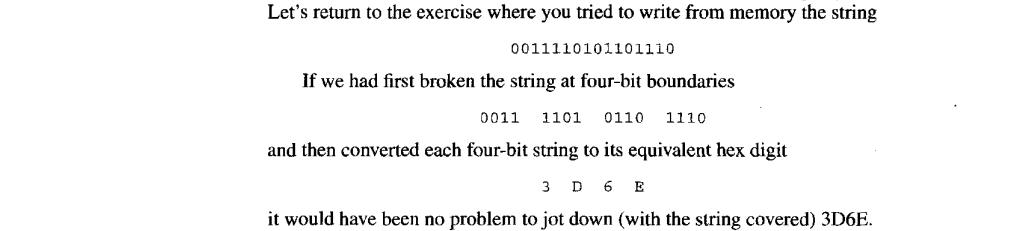

- In summary, hexadecimal notation is mainly used as a convenience for humans. 
- It can be used to represent binary strings that are integers or floating point numbers or sequences of ASCII codes, or bit vectors. 
- It simply reduces the number of digits by a factor of 4, where each digit is in hex (0,1, 2,.. . F) instead of binary (0, 1). 
- The usual result is far fewer copying errors due to too many 0s and Is. 